# 사전세팅

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 11.4 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
from IPython.display import display, Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import shutil
from google.colab import files

# Roboflow 코드

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="(your api key)")
project = rf.workspace("ballon-map-workspace").project("trash_balloon_detection_yolo")
version = project.version(1)
dataset = version.download("yolov8")

  Using cached roboflow-1.1.44-py3-none-any.whl.metadata (9.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached roboflow-1.1.44-py3-none-any.whl (79 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.93, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Trash_Balloon_Detection_YOLO-1 in yolov8:: 100%|██████████| 2470/2470 [00:00<00:00, 2843.17it/s]


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Trash_Balloon_Detection_YOLO-1/data.yaml epochs=50 imgsz=640 plots=True

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Trash_Balloon_Detection_YOLO-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

이 상황에서 YOLOv8n(나노) 모델이 다운로드되고 훈련에 사용된 이유는 AMP(Automatic Mixed Precision) 체크 때문이다.
훈련을 시작할 때, Ultralytics 프레임워크는 AMP 모드를 실행할 때의 성능을 확인하기 위해 기본적으로 경량화된 YOLOv8n 모델을 사용하여 빠른 검증을 수행한다.
이 검증 이후에는 원래 사용자가 지정한 모델, 즉 YOLOv8m이 실제 훈련에 사용됨!

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...

AMP: checks passed ✅

이는 AMP 체크가 완료된 후 YOLOv8m 모델로 훈련이 시작되었음을 의미한다.
AMP는 훈련 시 반정밀도(float16) 연산을 사용하여 메모리 사용량을 줄이고 속도를 높이기 위한 기술이다.
이 과정에서 프레임워크는 경량화된 YOLOv8n 모델을 이용해 체크를 수행하지만, 실제 훈련에는 사용자가 지정한 모델(여기서는 YOLOv8m)이 사용된다.

# 훈련 결과 출력

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# 현재 작업디렉토리 확인
import os
HOME = os.getcwd()
print(HOME)

/content


/content


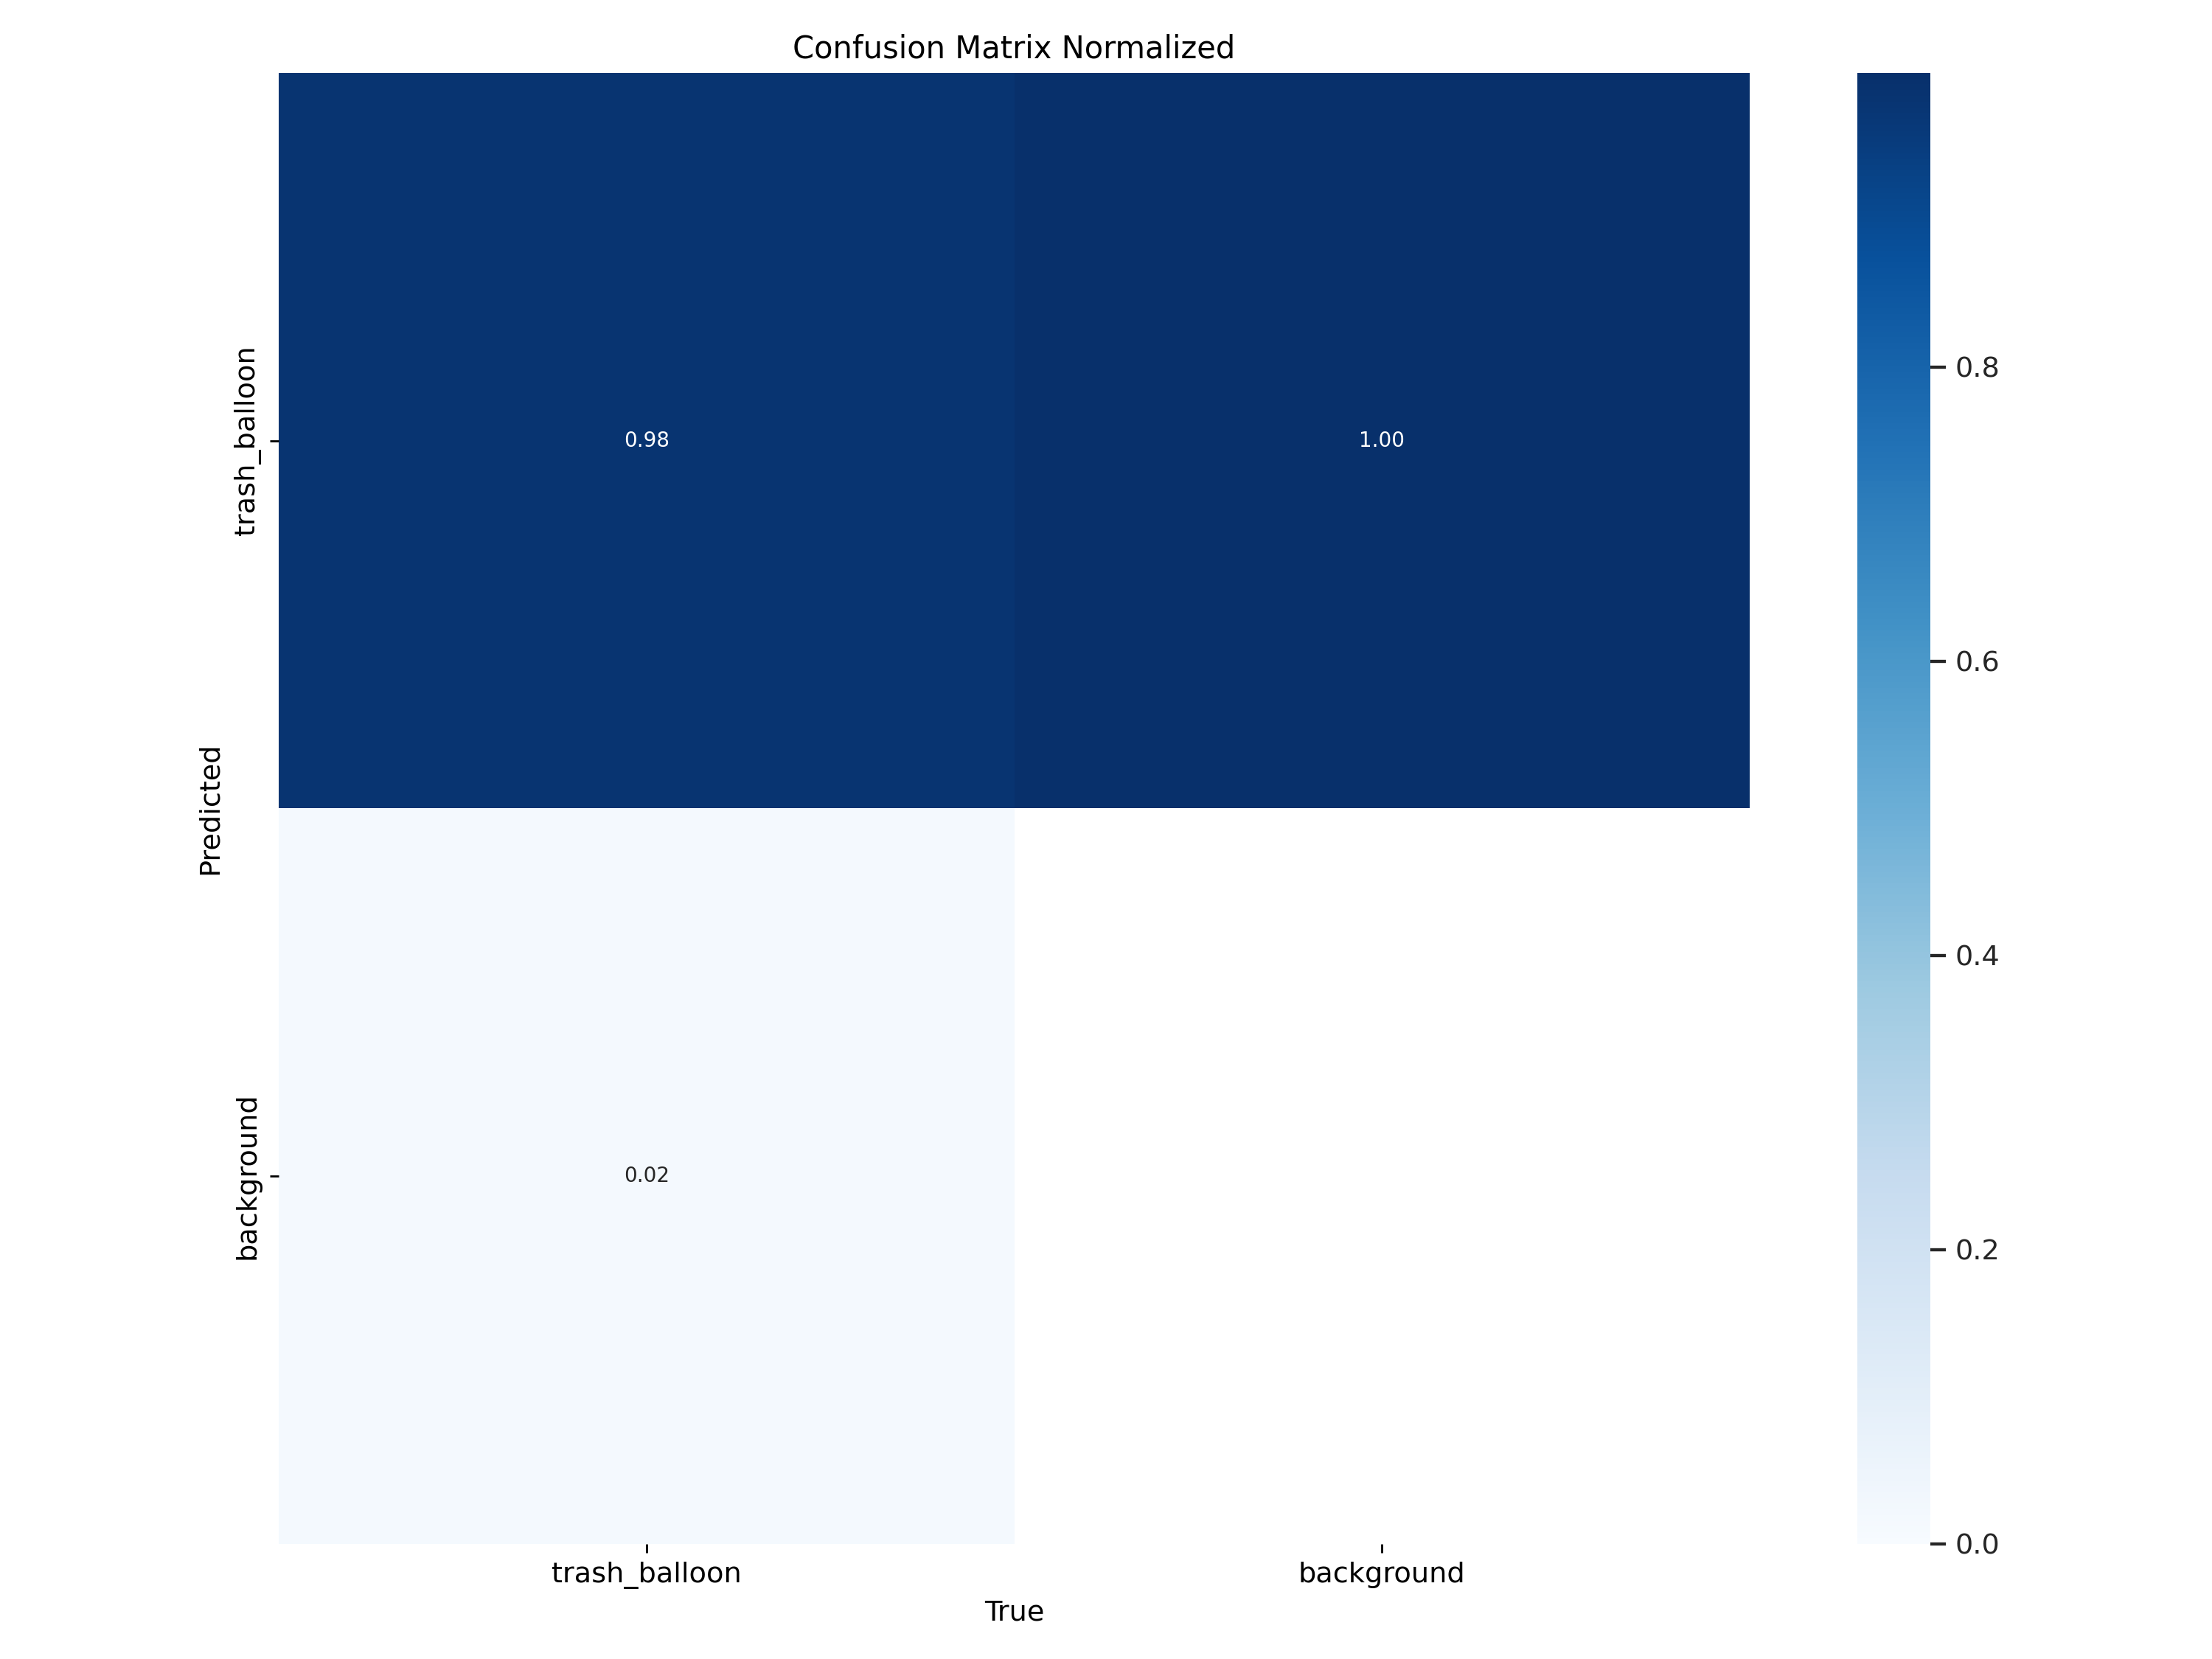

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1000)

/content


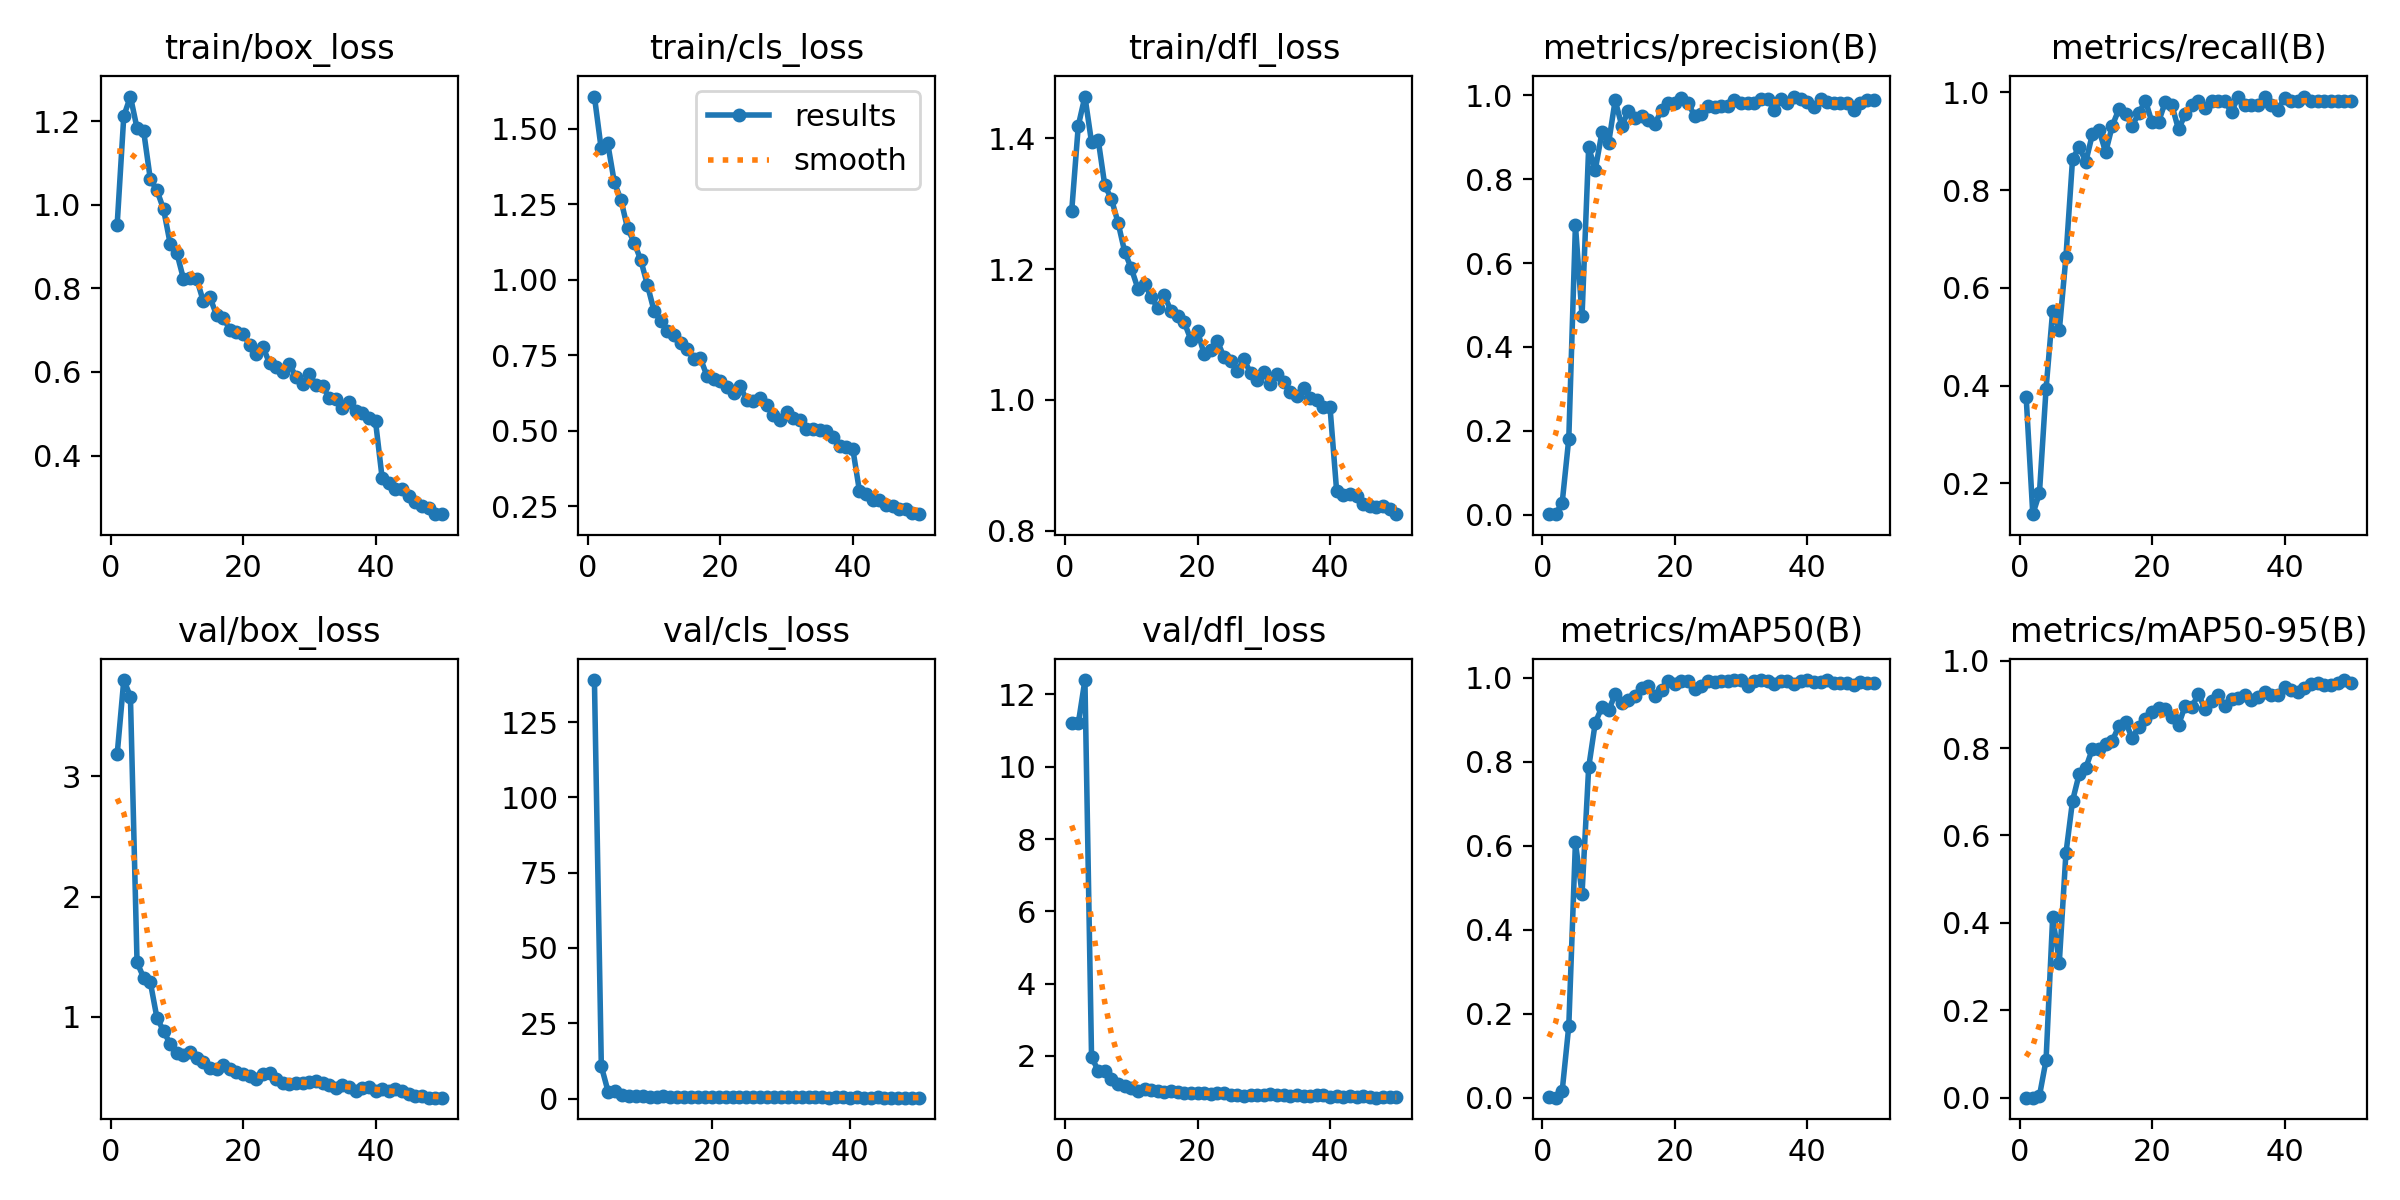

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


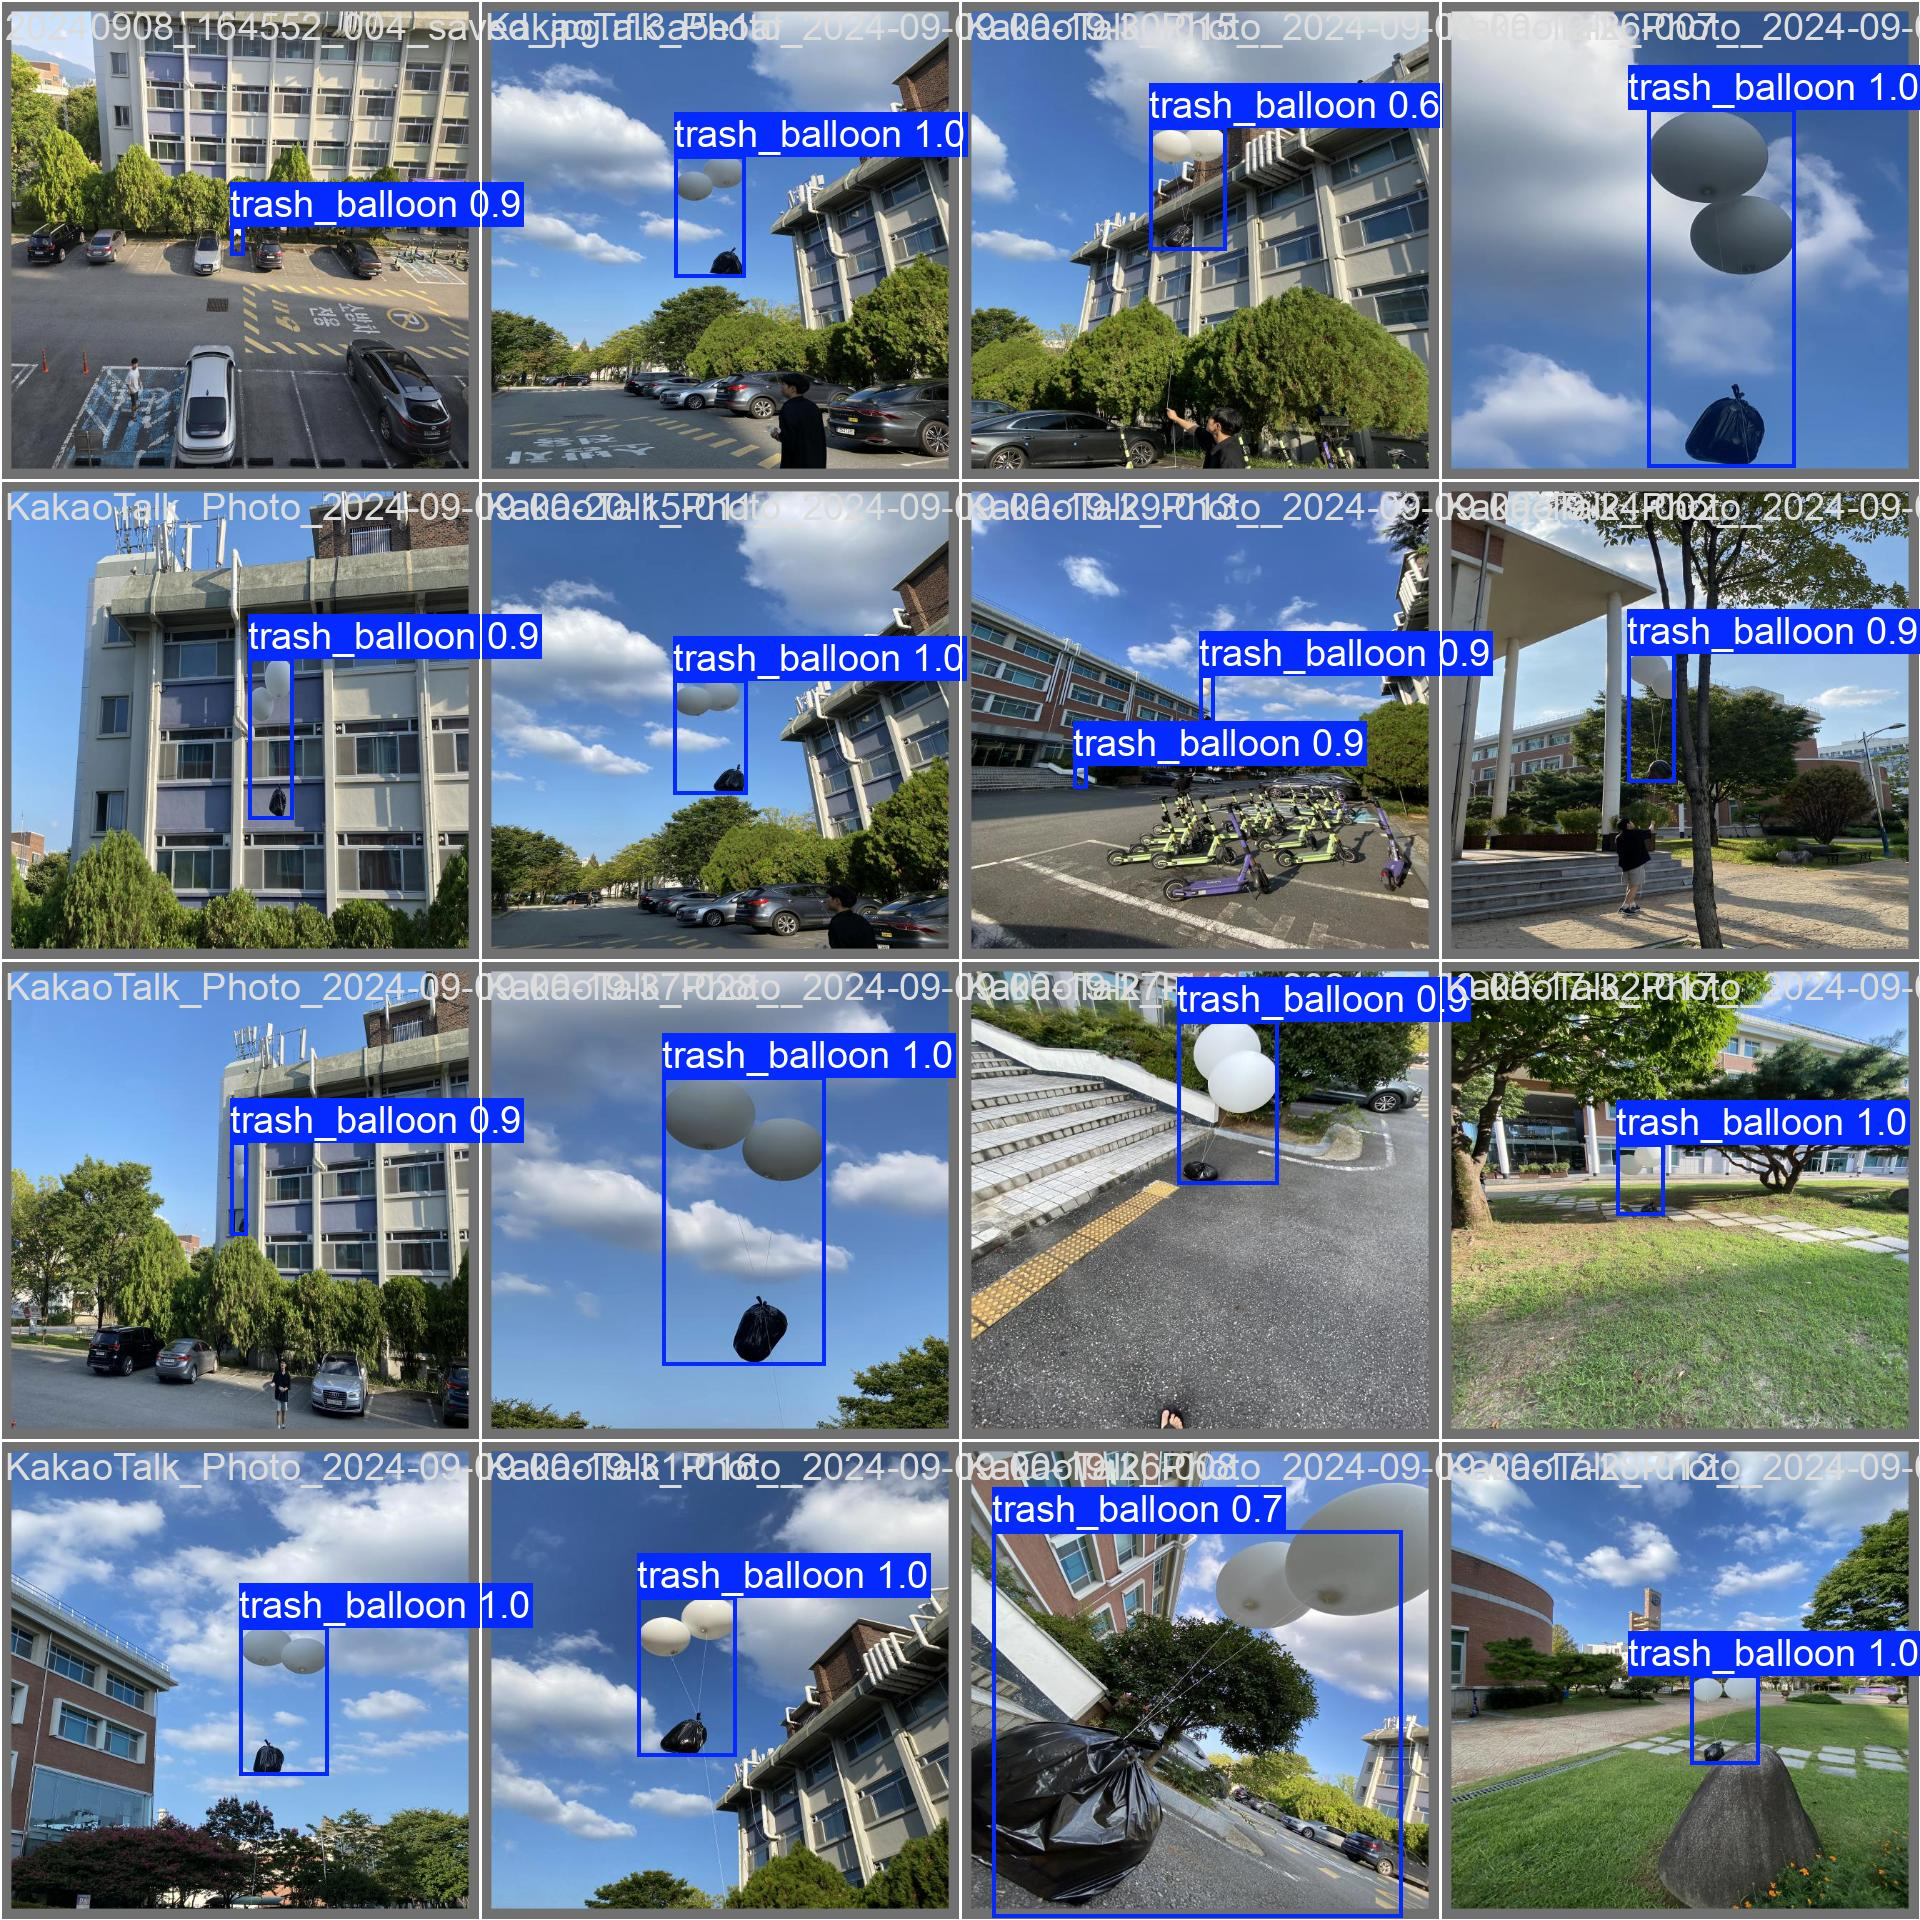

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600) # 검증 데이터셋 예측

/content


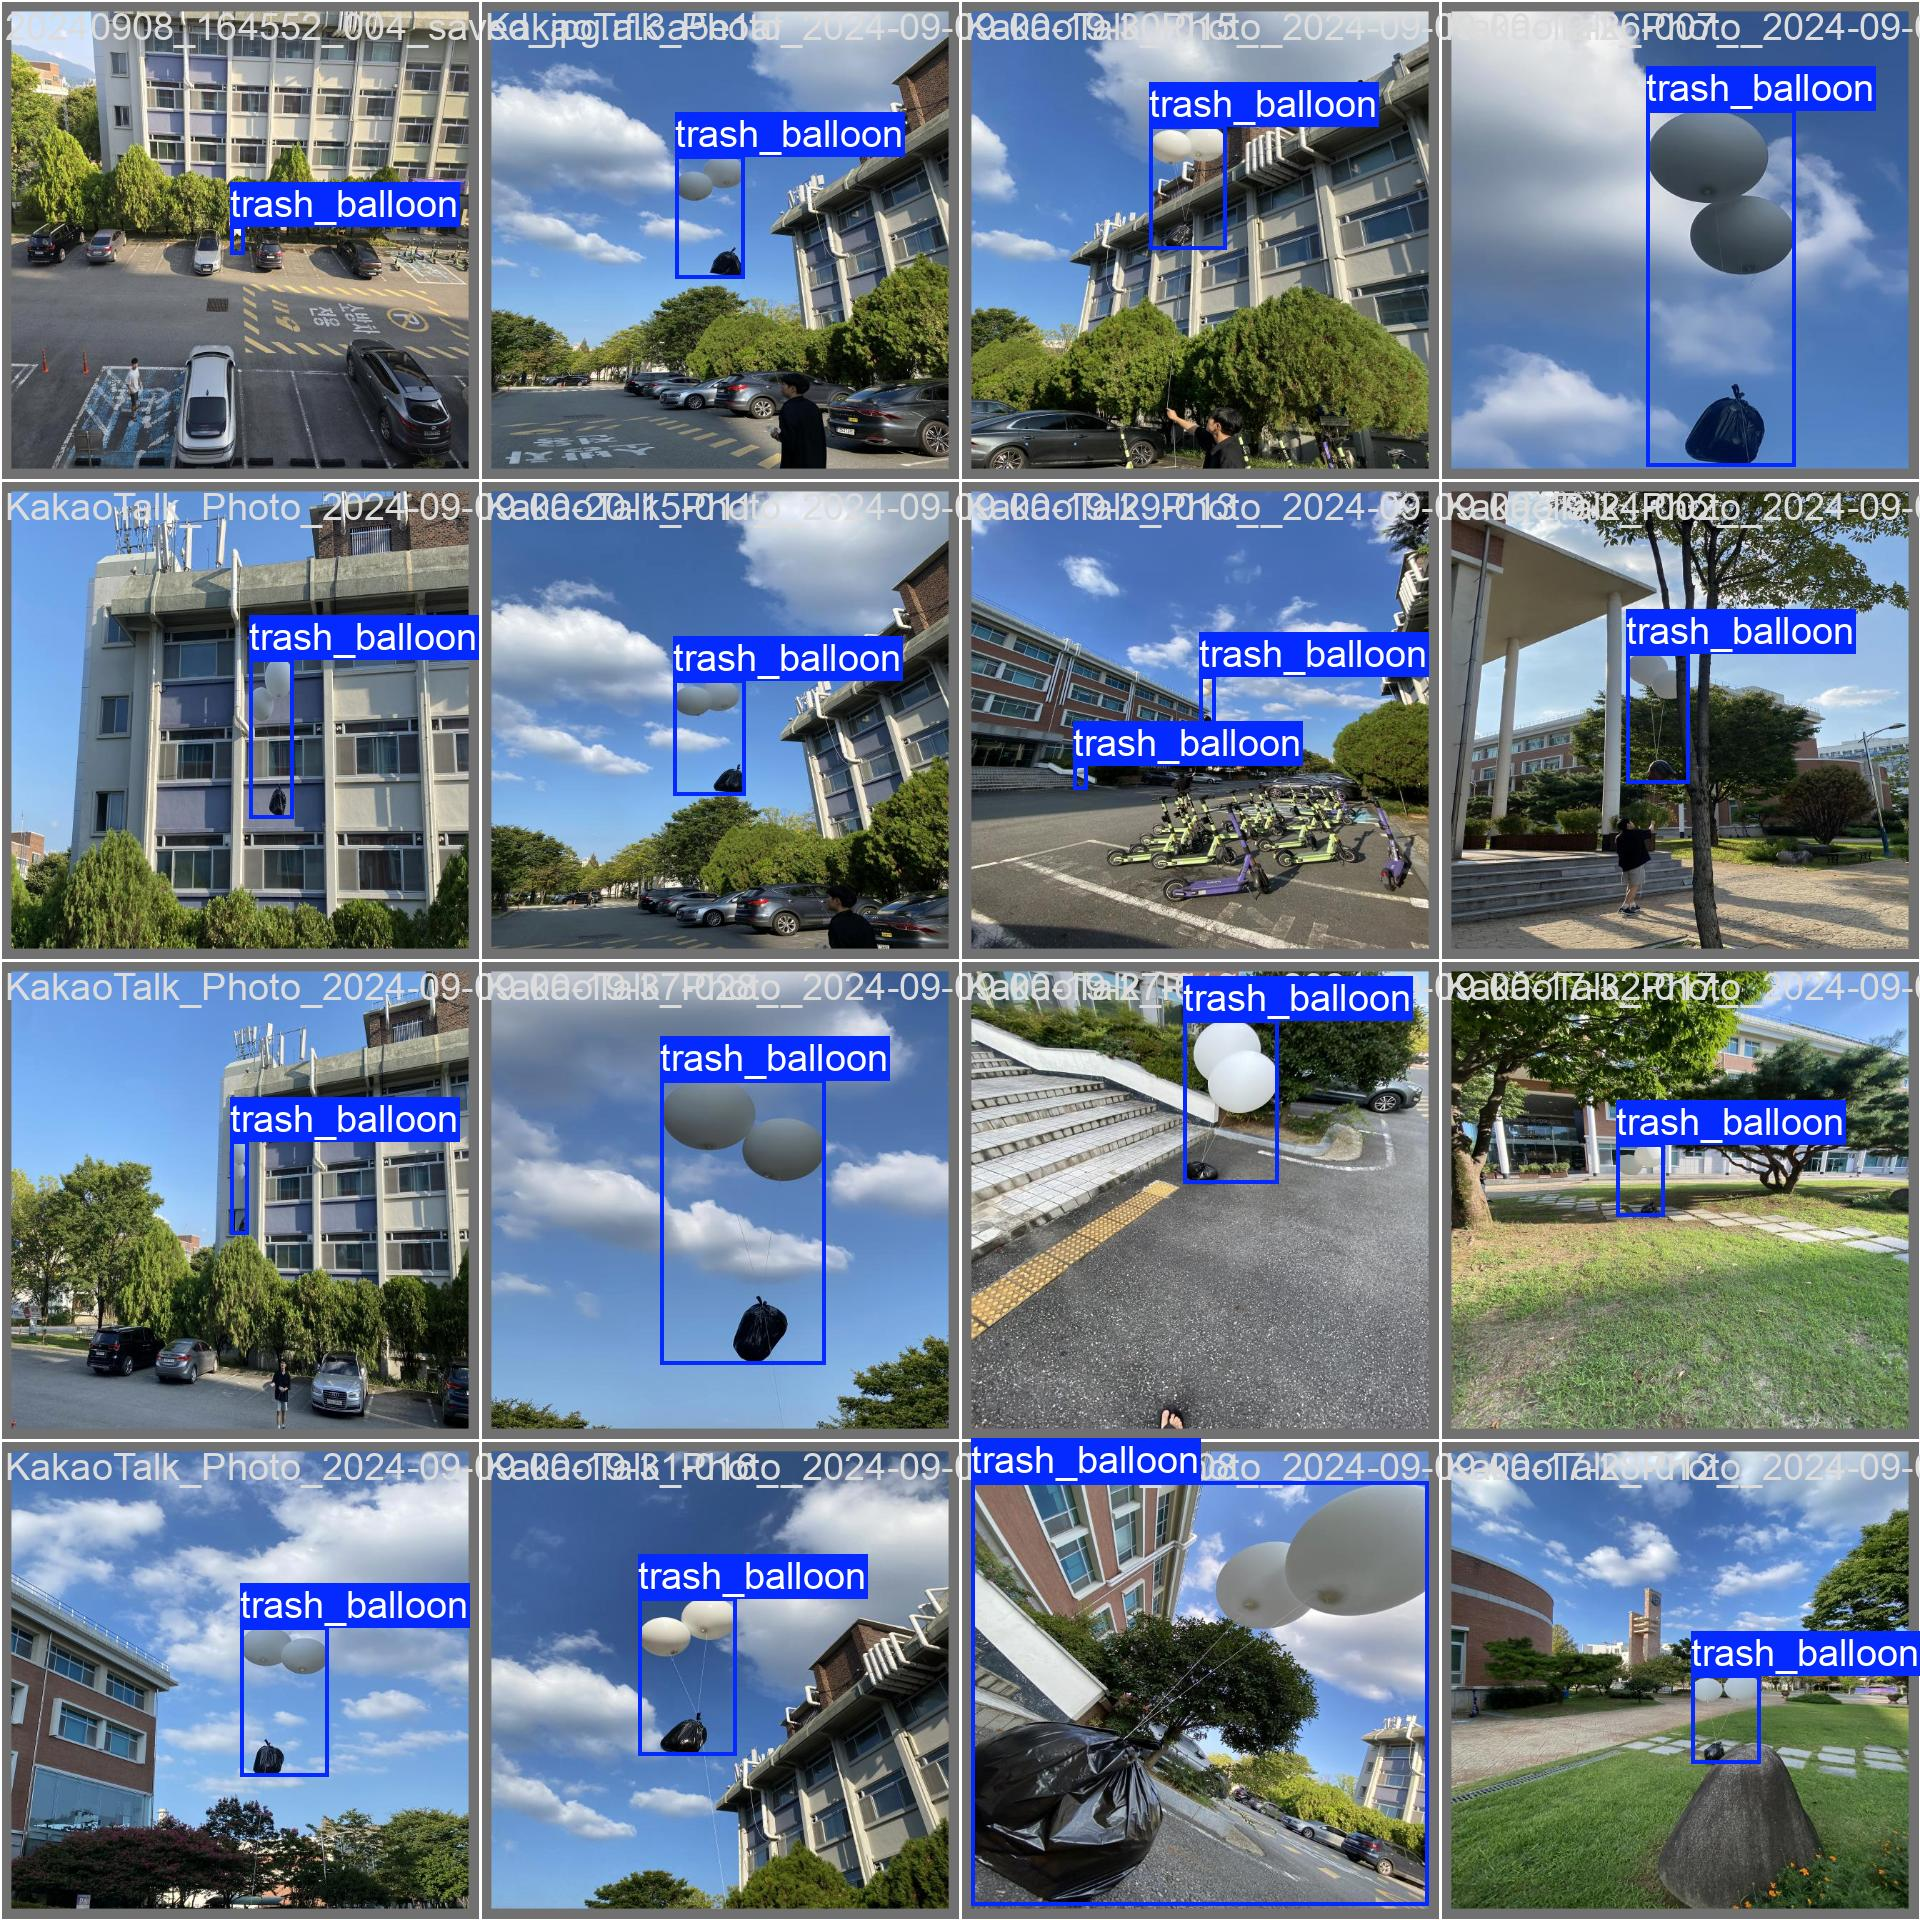

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600) # 검증 데이터셋 실제 라벨(데이터)

# 커스텀 모델 테스트

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Trash_Balloon_Detection_YOLO-1/test/images save=True

/content
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/-7-4-CCTV-_jpg.rf.dbe5e70f4412a9a153d2b0a214e58a1d.jpg: 640x640 1 trash_balloon, 37.0ms
image 2/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_164426-2-_jpg.rf.a3c526fb3280df22d9ed0ed3f7424592.jpg: 640x640 1 trash_balloon, 37.1ms
image 3/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_164535-1-_jpg.rf.d3a6823175aea0db122c9c07ec333e51.jpg: 640x640 1 trash_balloon, 37.0ms
image 4/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_170358_017_saved_jpg.rf.6121f8b7766f4e79b4648ae1f5c37db0.jpg: 640x640 1 trash_balloon, 37.0ms
image 5/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_170410_004_saved_jpg.rf.a6aaba5019e656cf72c1d03fa217db24.jpg: 640x640 1 trash_balloon, 37.1ms
image 6/112 /c

In [18]:
# 이미지 경로 리스트 불러오기
image_paths = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')

In [19]:
# 한 행에 출력할 이미지 수
num_images_per_row = 4

# 총 이미지 개수
num_images = len(image_paths)

# 이미지 출력 (한 행에 4개씩)
for i in range(0, num_images, num_images_per_row):
    # 각 행에 해당하는 이미지 경로
    row_images = image_paths[i:i + num_images_per_row]

    # 한 행에 4개씩 플롯 생성
    fig, axes = plt.subplots(1, len(row_images), figsize=(20, 20))

    for ax, image_path in zip(axes, row_images):
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # 축 숨기기

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 커스텀 모델 훈련 관련 폴더 runs 폴더 저장 및 이미지 & 어노테이션 데이터 저장

In [20]:
# runs 폴더 압축하기
shutil.make_archive('runs', 'zip', 'runs')

'/content/runs.zip'

In [21]:
# Trash_Balloon_Detection-1 폴더 압축하기
shutil.make_archive('Trash_Balloon_Detection-1', 'zip', 'Trash_Balloon_Detection-1')

'/content/Trash_Balloon_Detection-1.zip'

In [22]:
# 파일 다운로드
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 다운로드
# 참고 : 이 파일은 그냥 따로 직접 다운받는게 좋음
files.download('Trash_Balloon_Detection-1.zip')